In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FILEPATH = 'JSON cleaning/js_bns2_test_2_clean.json'
with open(FILEPATH, mode="r") as file:
    data = json.load(file)

kilonovae = data["kilonovae"]

In [4]:
twelve_hour_data = []
for kn in kilonovae:
    twelve_hour_data.append([kn["data_points"][i] for i in range(30,36)])

In [5]:
colours = []
z_magnitudes = []
for kn in twelve_hour_data:
    for i in kn:
        if i['band'] == 'g':
            g_mag = float(i['magnitude'])
        elif i['band'] == 'z':
            z_mag = float(i['magnitude'])
    colours.append(g_mag - z_mag)
    z_magnitudes.append(z_mag)

Text(0, 0.5, 'g-z')

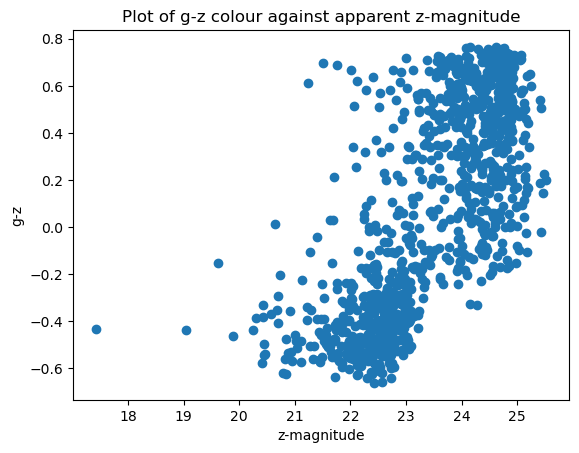

In [7]:
plt.scatter(z_magnitudes, colours)
plt.title("Plot of g-z colour against apparent z-magnitude")
plt.xlabel("z-magnitude")
plt.ylabel("g-z")
# plt.savefig("g-z against z")
# plt.close()

# New Version

In [8]:
def colours(colour1, colour2):
    colours = []
    timed_data = []
    for kn in kilonovae:
        timed_data.append([kn["data_points"][i] for i in range(len(kn["data_points"])) if float(kn["data_points"][i]["time"])==0.5])
    for kn in timed_data:
        for i in kn:
            if i['band'] == colour1:
                c1_mag = float(i['magnitude'])
            elif i['band'] == colour2:
                c2_mag = float(i['magnitude'])
        colours.append(c1_mag - c2_mag)
    plt.hist(colours, bins=30, density=False)
    plt.title(f'Histogram of {colour1}-{colour2} colour 12 hours after merger')
    plt.xlabel(f'${colour1}-{colour2}$')
    #plt.savefig(f'../Final Plots/Colour plots/{colour1}-{colour2} {DATE} histogram.pdf')
    #plt.close()

In [9]:
def data_at_time(time):
    timed_data = []
    for kn in kilonovae:
        timed_data.append([kn["data_points"][i] for i in range(len(kn["data_points"])) if float(kn["data_points"][i]["time"])==time])
    return timed_data

In [10]:
def colour_variation(colour1, colour2):
    times = np.linspace(0, 2, num=5)
    j=0
    for time in times:
        colours = []
        timed_data = data_at_time(time)
        for kn in timed_data:
            for i in kn:
                if i['band'] == colour1:
                    c1_mag = float(i['magnitude'])
                elif i['band'] == colour2:
                    c2_mag = float(i['magnitude'])
            colours.append(c1_mag - c2_mag)
        plt.hist(colours, bins=30, density=False, histtype='step', label=f'{int(time*24)} hours', color=colors[j])
        j+=1
    plt.xlabel(r'$\mathdefault{g}-\mathdefault{z}$')
    plt.ylabel('Bin count')
    plt.legend()
#     plt.savefig(f'../Report Plots/Total {colour1}-{colour2} {DATE} histogram.pdf', bbox_inches='tight')
#     plt.close()

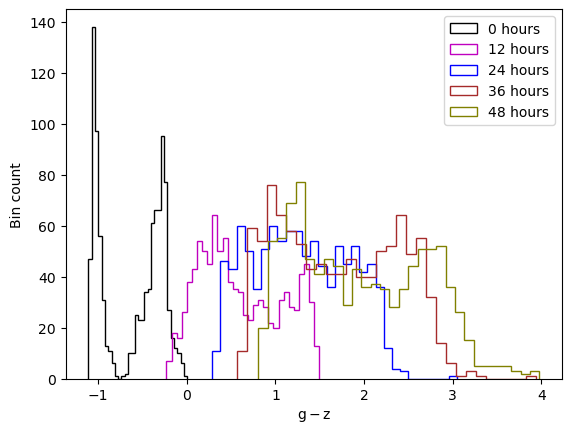

In [11]:
colors = ['k', 'm', 'b', 'brown', 'olive']
colour_variation('g', 'z')